In [42]:
#imports
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
ls ../..

097_SpeakerMap.txt  data/               environment/
README.md           descr_097.txt       speeches_097.txt


In [40]:
descr = pd.read_csv('../../descr_097.txt', sep="|")
descr[:15]

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,970000001,S,19810105,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,17,62,01051981.txt,1543,283
1,970000002,S,19810105,2,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,65,74,01051981.txt,334,55
2,970000003,S,19810105,3,The VICE,Unknown,Unknown,Unknown,Special,200,212,01051981.txt,466,82
3,970000004,S,19810105,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,858,864,01051981.txt,210,37
4,970000005,S,19810105,5,Mr. PERCY,Unknown,PERCY,Unknown,M,883,889,01051981.txt,201,34
5,970000006,S,19810105,6,Mr. HUDDLESTON,Unknown,HUDDLESTON,Unknown,M,895,901,01051981.txt,202,34
6,970000007,S,19810105,7,Mr. JAcKSON,Unknown,JACKSON,Unknown,M,907,913,01051981.txt,201,34
7,970000008,S,19810105,8,Mr. STAFFORD,Unknown,STAFFORD,Unknown,M,932,938,01051981.txt,201,34
8,970000009,S,19810105,9,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,984,985,01051981.txt,48,7
9,970000010,S,19810105,10,Mr. BAKER,Unknown,BAKER,Unknown,M,986,987,01051981.txt,49,9


In [5]:
descr.shape

283398

In [8]:
descr['fullname'] = descr.last_name.str.cat(descr.first_name, sep = ', ')
descr.head()

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count,fullname
0,970000001,S,19810105,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,17,62,01051981.txt,1543,283,"Unknown, Unknown"
1,970000002,S,19810105,2,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,65,74,01051981.txt,334,55,"Unknown, Unknown"
2,970000003,S,19810105,3,The VICE,Unknown,Unknown,Unknown,Special,200,212,01051981.txt,466,82,"Unknown, Unknown"
3,970000004,S,19810105,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,858,864,01051981.txt,210,37,"Unknown, Unknown"
4,970000005,S,19810105,5,Mr. PERCY,Unknown,PERCY,Unknown,M,883,889,01051981.txt,201,34,"PERCY, Unknown"


In [15]:
speakermap = pd.read_csv('../../097_SpeakerMap.txt', sep="|")
speakermap[:15]

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting
5,97104811,970000012,BAKER,HOWARD,S,TN,M,R,NaN,voting
6,97107681,970000013,CRANSTON,ALAN,S,CA,M,D,NaN,voting
7,97104811,970000015,BAKER,HOWARD,S,TN,M,R,NaN,voting
8,97104811,970000016,BAKER,HOWARD,S,TN,M,R,NaN,voting
9,97104811,970000019,BAKER,HOWARD,S,TN,M,R,NaN,voting


In [16]:
speakermap['fullname'] = speakermap.lastname.str.cat(speakermap.firstname, sep = ', ')
speakermap.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,fullname
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting,"PERCY, CHARLES"
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting,"HUDDLESTON, WALTER"
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting,"JACKSON, HENRY"
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting,"STAFFORD, ROBERT"
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting,"BAKER, HOWARD"


In [29]:
speakermap_unique = speakermap.drop_duplicates(subset='speech_id', keep='first', inplace=False)
speakermap_unique.head()

,speakerid,speech_id,lastname,firstname,chamber,state,gender,party,district,nonvoting,fullname
0,97105301,970000005,PERCY,CHARLES,S,IL,M,R,NaN,voting,"PERCY, CHARLES"
1,97105071,970000006,HUDDLESTON,WALTER,S,KY,M,D,NaN,voting,"HUDDLESTON, WALTER"
2,97106761,970000007,JACKSON,HENRY,S,WA,M,D,NaN,voting,"JACKSON, HENRY"
3,97106981,970000008,STAFFORD,ROBERT,S,VT,M,R,NaN,voting,"STAFFORD, ROBERT"
4,97104811,970000010,BAKER,HOWARD,S,TN,M,R,NaN,voting,"BAKER, HOWARD"


In [48]:
#descr['speakerid'] = speakermap['speech_id']

for i in range(len(descr)):
    speech_id = descr.iloc[i]['speech_id']
    speakerid = speakermap_unique[speakermap_unique['speech_id']==speech_id]['speakerid']
    #speakerid = speakermap_unique.iloc[index]['speakerid']
    descr['speakerid'] = speakerid


,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count,speakerid
283388,970283389,S,19821223,485,The PRESIDING OFFICER,Unknown,Unknown,Unknown,Special,18922,18923,12231982.txt,36,6,NaN
283389,970283390,S,19821223,486,The PRESIDING OFFICER,Unknown,Unknown,Unknown,Special,18943,18945,12231982.txt,66,10,NaN
283390,970283391,S,19821223,487,Mr. BAKER,Unknown,BAKER,Unknown,M,18948,18953,12231982.txt,154,27,NaN
283391,970283392,S,19821223,488,The PRESIDING OFFICER,Unknown,Unknown,Unknown,Special,18954,18955,12231982.txt,29,6,NaN
283392,970283393,S,19821223,489,Mr. BAKER,Unknown,BAKER,Unknown,M,18958,18960,12231982.txt,87,15,NaN
283393,970283394,S,19821223,490,The PRESIDING OFFICER,Unknown,Unknown,Unknown,Special,18961,18962,12231982.txt,36,6,NaN
283394,970283395,S,19821223,491,Mr. BAKER,Unknown,BAKER,Unknown,M,18965,18980,12231982.txt,563,104,NaN
283395,970283396,S,19821223,492,Mr. BAKER,Unknown,BAKER,Unknown,M,18984,19452,12231982.txt,15778,2533,NaN
283396,970283397,S,19821223,493,Mr. PERCY,Unknown,PERCY,Unknown,M,19453,19528,12231982.txt,2573,390,NaN
283397,970283398,S,19821223,494,Mr. BAKER,Unknown,BAKER,Unknown,M,19555,19560,12231982.txt,189,32,NaN


In [43]:
descr.head()

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,970000001,S,19810105,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,17,62,01051981.txt,1543,283
1,970000002,S,19810105,2,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,65,74,01051981.txt,334,55
2,970000003,S,19810105,3,The VICE,Unknown,Unknown,Unknown,Special,200,212,01051981.txt,466,82
3,970000004,S,19810105,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,858,864,01051981.txt,210,37
4,970000005,S,19810105,5,Mr. PERCY,Unknown,PERCY,Unknown,M,883,889,01051981.txt,201,34


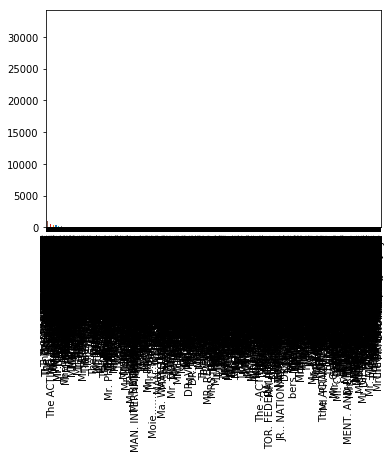

In [14]:
descr.speakerid.value_counts().plot.bar()

In [ ]:
descr_speakerid = descr.groupby['speakerid']
descr_speakerid.shape

In [ ]:
descr_speakerid.char_count.value_counts().plot.bar()

In [ ]:
descr_speakerid.word_count.value_counts().plot.bar()

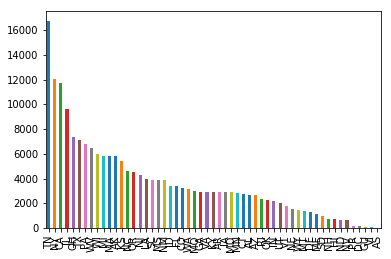

In [54]:
speakermap.state.value_counts().plot.bar()

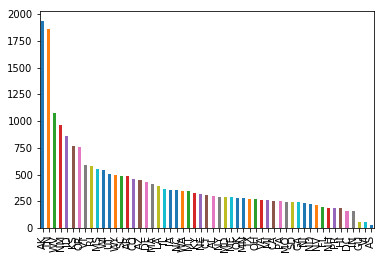

In [75]:
x = speakermap.state.value_counts()/speakermap_unique.state.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

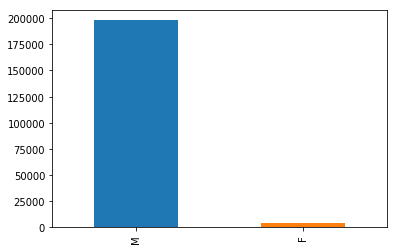

In [55]:
descr.gender.value_counts().plot.bar()

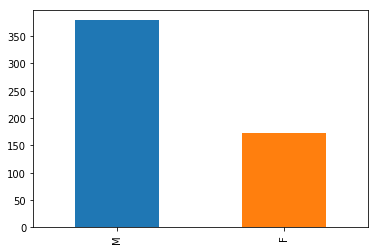

In [76]:
x = descr.gender.value_counts()/descr_unique.gender.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

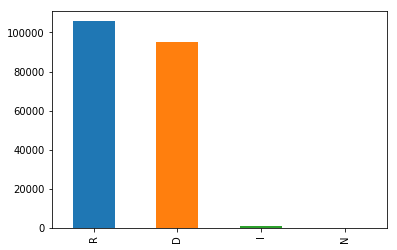

In [51]:
speakermap.party.value_counts().plot.bar()

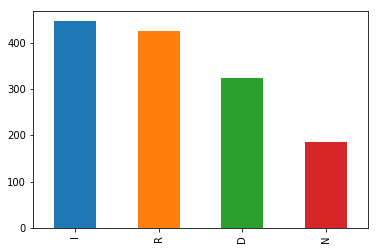

In [78]:
x = speakermap.party.value_counts()/speakermap_unique.party.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()